# Machine Learning

In this section, we try to predict the global sale by 5 different machine learning mode. Both regression mode and classification model were used.

#### Library import

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
%matplotlib inline
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
from sklearn.model_selection import train_test_split

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

#### Data import

In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns.values

array(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count',
       'Developer', 'Rating'], dtype=object)

Plot the global sale vs the critic score.

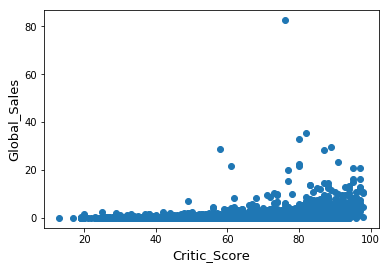

In [212]:
plt.scatter(x = df['Critic_Score'], y = df['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)
plt.show()

From the plot above, we could find one obvious outlier. We could just drop the one outlier.

Locate the outlier row.

In [213]:
df[(df['Critic_Score']>60) & (df['Global_Sales']>60)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E


Drop the outlier.

In [214]:
df = df.drop(df[(df['Critic_Score']>60) & (df['Global_Sales']>60)].index)

Deal with NaN

In [216]:
# calculate the missing value ratio
data_na = (df.isnull().sum() / len(df)) * 100  # calculate the propotion of 'NaN' value in each columns
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
User_Count,54.600383
Critic_Count,51.328069
Critic_Score,51.328069
Rating,40.482173
User_Score,40.093324
Developer,39.608758
Year_of_Release,1.609237
Publisher,0.323044


<br/>The propotion of the 'NaN' value in the dataset were shown in the above table. We found that there was a huge amount of data that were containing 'NaN' value. 

In [217]:
print(pd.value_counts(df["Platform"])) # print out all platforms and the number of games that each platform had

PS2     2161
DS      2152
PS3     1331
Wii     1319
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64


As we can see, there are actually a lot of different platforms in the dataset. As previously mentioned, it might be most relevant to look at only current gen consoles in our model, however the issue here is that we will have a limited amount of data. Therefore, let's widen our scope somewhat and look at the following platforms: PS3, PS4, X360, XOne, PC, Wii and WiiU. This ensures that we won't have too little data. Let's keep only relevant platforms.
We selected the platform from 7th generation and 8th generation. Since PC has a huge share of video game market, we also selected PC.

In [218]:
df = df[(df['Platform'] == 'PS3')  | (df['Platform'] == 'PS4')  | 
        (df['Platform'] == 'X360') | (df['Platform'] == 'XOne') | 
        (df['Platform'] == 'Wii')  | (df['Platform'] == 'WiiU') |
        (df['Platform'] == 'PC') ]   # select the rows that the platforms were from 7th and 8th generation and pc

Since the global sales are the sum of NA_Sales, EU_Sales, JP_Sales, Other_Sales and video games saled all over the world. In this project we only consider global sales.

In [288]:
# cteate a new dataframe without  NA_Sales, EU_Sales, JP_Sales, Other_Sales
df_generation = df[['Name','Platform','Year_of_Release','Genre','Publisher',  
                    'Developer','Global_Sales','Critic_Score','Rating','Critic_Count','User_Score','User_Count']] 
df_generation

,Name,Platform,Year_of_Release,Genre,Publisher,Developer,Global_Sales,Critic_Score,Rating,Critic_Count,User_Score,User_Count
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,Nintendo,35.52,82.0,E,73.0,8.3,709.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,Nintendo,32.77,80.0,E,73.0,8,192.0
7,Wii Play,Wii,2006.0,Misc,Nintendo,Nintendo,28.92,58.0,E,41.0,6.6,129.0
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,Nintendo,28.32,87.0,E,80.0,8.4,594.0
13,Wii Fit,Wii,2007.0,Sports,Nintendo,Nintendo,22.70,80.0,E,63.0,7.7,146.0
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,Good Science Studio,21.81,61.0,E,45.0,6.3,106.0
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,Nintendo,21.79,80.0,E,33.0,7.4,52.0
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,Rockstar North,21.04,97.0,M,50.0,8.2,3994.0
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,Rockstar North,16.27,97.0,M,58.0,8.1,3711.0
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,"Infinity Ward, Sledgehammer Games",14.73,88.0,M,81.0,3.4,8713.0


In [289]:
# calculate the propotion of 'NaN' of new dataset
data_na = (df_generation.isnull().sum() / len(df_generation)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
Critic_Count,37.493390
Critic_Score,37.493390
User_Count,34.584876
Rating,23.761678
User_Score,22.563018
Developer,21.716905
Year_of_Release,1.868500
Publisher,0.229156


Drop all the rows that contained 'NaN'.

In [290]:
df_generation = df_generation.dropna(how='any',axis=0)

In [293]:
print(pd.value_counts(df_generation["Platform"]))

X360    858
PS3     769
PC      651
Wii     478
PS4     239
XOne    159
WiiU     89
Name: Platform, dtype: int64


In [294]:
# convert the data type in the column 'User_Score' to float
df_generation['User_Score']=df_generation['User_Score'].astype(np.number)

In [295]:
# drop the columns 'Publisher' and 'Developer'
df_generation = df_generation[['Platform','Genre','Global_Sales','Critic_Score','Rating','Critic_Count','User_Score','User_Count']]

In [304]:
# reset the index of dataframe
df_generation.reset_index(inplace = True)

# drop the origin index
df_generation.drop(['index'], axis = 1,inplace = True)

In [305]:
# get a copy of dataset that the platforms were from 7th and 8th generation and pc
df_clf = df_generation

## Classification

In [306]:
df_clf

,Platform,Genre,Global_Sales,Critic_Score,Rating,Critic_Count,User_Score,User_Count
0,Wii,Racing,35.52,82.0,E,73.0,8.3,709.0
1,Wii,Sports,32.77,80.0,E,73.0,8.0,192.0
2,Wii,Misc,28.92,58.0,E,41.0,6.6,129.0
3,Wii,Platform,28.32,87.0,E,80.0,8.4,594.0
4,Wii,Sports,22.70,80.0,E,63.0,7.7,146.0
5,X360,Misc,21.81,61.0,E,45.0,6.3,106.0
6,Wii,Sports,21.79,80.0,E,33.0,7.4,52.0
7,PS3,Action,21.04,97.0,M,50.0,8.2,3994.0
8,X360,Action,16.27,97.0,M,58.0,8.1,3711.0
9,X360,Shooter,14.73,88.0,M,81.0,3.4,8713.0


We choose platform genre critic score rating and user score to be the features for the classification model and global sales to be the label.

In [307]:
# select the columns that would be used in the model training
df_clf = df_clf[['Platform','Genre','Global_Sales','Critic_Score','Rating','User_Score']]

The dataset contained both continuous and dicrete varialbes. We convert the continuous varialbes into dicrete variables to perform classification.

In [308]:
# define a function to convert global sales into three classes.
def convert_sale(X):
    if X >= 1.0:
        X = 'High'
    elif X < 1.0 and X >= 0.2:
        X = 'Medium'
    else:
        X = 'Low'
    return X

In [309]:
# convert global sales into classes
for i in range(len(df_clf['Global_Sales'])):
    df_clf['Global_Sales'][i] = convert_sale(df_clf['Global_Sales'][i])

In [310]:
# define a function to convert critic score into four classes.
def convert_critic(X):
    if X >= 85:
        X = 'A'
    elif X < 85 and X >= 75:
        X = 'B'
    elif X < 75 and X >= 65:
        X = 'C'
    else:
        X = 'D'
    return X

In [311]:
for i in range(len(df_clf['Critic_Score'])):
    df_clf['Critic_Score'][i] = convert_critic(df_clf['Critic_Score'][i])

In [312]:
# define a function to convert user score into four classes.
def convert_user(X):
    if X >= 8.5:
        X = 'A'
    elif X < 8.5 and X >= 7.5:
        X = 'B'
    elif X < 7.5 and X >= 6.5:
        X = 'C'
    else:
        X = 'D'
    return X

In [313]:
for i in range(len(df_clf['User_Score'])):
    df_clf['User_Score'][i] = convert_user(df_clf['User_Score'][i])

In [314]:
# check whether the continuous variables had been convert into discrete variables
df_clf

,Platform,Genre,Global_Sales,Critic_Score,Rating,User_Score
0,Wii,Racing,High,B,E,B
1,Wii,Sports,High,B,E,B
2,Wii,Misc,High,D,E,C
3,Wii,Platform,High,A,E,B
4,Wii,Sports,High,B,E,B
5,X360,Misc,High,D,E,D
6,Wii,Sports,High,B,E,C
7,PS3,Action,High,A,M,B
8,X360,Action,High,A,M,B
9,X360,Shooter,High,A,M,D


Convert the categorical data type into encoder

In [315]:
def create_label_encoder_dict(df):
    from sklearn.preprocessing import LabelEncoder

    label_encoder_dict = {}
    for column in df.columns:
        # Only create encoder for categorical data types
        if not np.issubdtype(df[column].dtype, np.number) and column != 'Age':
            label_encoder_dict[column]= LabelEncoder().fit(df[column].astype(str))
    return label_encoder_dict

In [316]:
label_encoders = create_label_encoder_dict(df_clf)

In [317]:
ratingsEM_data = df_clf.copy() # create copy of initial data set
for column in ratingsEM_data.columns:
    if column in label_encoders:
        ratingsEM_data[column] = label_encoders[column].transform(ratingsEM_data[column])

In [318]:
# check whether the categorical data had been encodered
ratingsEM_data

,Platform,Genre,Global_Sales,Critic_Score,Rating,User_Score
0,3,6,0,1,0,1
1,3,10,0,1,0,1
2,3,3,0,3,0,2
3,3,4,0,0,0,1
4,3,10,0,1,0,1
5,5,3,0,3,0,3
6,3,10,0,1,0,2
7,1,0,0,0,2,1
8,5,0,0,0,2,1
9,5,8,0,0,2,3


Data Split

In [319]:
X = ratingsEM_data[['Platform', 'Genre', 'Rating','User_Score','Critic_Score']]
Y = ratingsEM_data['Global_Sales']

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### DisicionTreeClassifier

Use decisiontreeclassifier to learn the features

In [322]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [326]:
# set the candidate parameters
max_depth = range(1,10,1)
min_samples_leaf = range(1,10,2)
tuned_parameters = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

In [327]:
# apply gridsearch to find the best parameters
from sklearn.model_selection import GridSearchCV
DD = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), tuned_parameters,cv=10)
DD.fit(X_train, y_train)

print("Best: %f using %s" % (DD.best_score_, DD.best_params_))

Best: 0.585197 using {'max_depth': 7, 'min_samples_leaf': 7}


In [328]:
# set model with the best parameters
clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=7,criterion='entropy')

In [329]:
# train model
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [334]:
k = (clf.predict(X_test)  == y_test)

In [335]:
counts = k.value_counts()
counts

True     356
False    293
Name: Global_Sales, dtype: int64

In [336]:
# define a function to calculate the accuracy of the classifier
def accuracy (k):
    rate = k[1]/(k[0]+k[1])
    return print("The accuracy of the model is", round(rate*100,2), '%')

In [337]:
# calculate the accuracy
accuracy(counts)

The accuracy of the model is 54.85 %


Confusion Matrix

In [343]:
from sklearn.metrics import confusion_matrix

In [346]:
def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    import itertools
    """
     This function prints and plots the confusion matrix.
     Normalization can be applied by setting `normalize=True`.
     """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True user score')
    plt.xlabel('Predicted user score')

Confusion matrix, without normalization
[[142  28  74]
 [ 89  67  12]
 [ 83   7 147]]


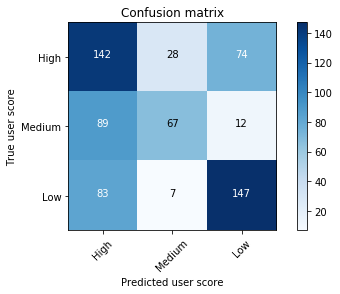

In [348]:
cm=confusion_matrix(y_test, clf.predict(X_test), labels=y_test.unique())
plot_confusion_matrix(cm,df_clf['Global_Sales'].unique())

### RandomForest Classifier

In [349]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [350]:
param_grid_rfclf = [  {'n_estimators': [100,150, 200, 225, 250, 275],
                     'max_features': [0.25, 0.5, 0.75, 1.0], 
                     'max_depth': [ 5, 7, 9, 11, 13, 14]}]

In [351]:
from sklearn.model_selection import GridSearchCV
grid_search_rfclf = GridSearchCV(RandomForestClassifier(), param_grid_rfclf, cv=5)
grid_search_rfclf.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_rfclf.best_params_))

Best parameters: {'max_depth': 7, 'max_features': 0.75, 'n_estimators': 250}


In [352]:
rfclf = RandomForestClassifier(n_estimators =250 ,max_features=0.75 ,max_depth=7 )

In [353]:
rfclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=0.75, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [354]:
k=(rfclf.predict(X_test) == y_test)
counts = k.value_counts()
counts

True     363
False    286
Name: Global_Sales, dtype: int64

In [355]:
accuracy(counts)

The accuracy of the model is 55.93 %


Confusion matrix, without normalization
[[162  21  61]
 [ 93  60  15]
 [ 92   4 141]]


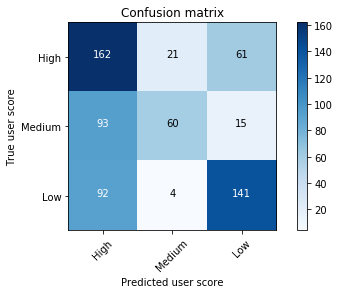

In [357]:
cm=confusion_matrix(y_test, rfclf.predict(X_test), labels=y_test.unique())
plot_confusion_matrix(cm,df_clf['Global_Sales'].unique())

## Regression

convert discrete variables into dummy data

In [268]:
print(df_generation.shape) #pre-dummies shape
df_generation = pd.get_dummies(data=df_generation, columns=['Platform', 'Genre', 'Rating'])
print(df_generation.shape) #post-dummies shape
df_generation.head

(3243, 8)
(3243, 29)


<bound method NDFrame.head of        Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count  \
2             35.52          82.0          73.0         8.3       709.0   
3             32.77          80.0          73.0         8.0       192.0   
7             28.92          58.0          41.0         6.6       129.0   
8             28.32          87.0          80.0         8.4       594.0   
13            22.70          80.0          63.0         7.7       146.0   
14            21.81          61.0          45.0         6.3       106.0   
15            21.79          80.0          33.0         7.4        52.0   
16            21.04          97.0          50.0         8.2      3994.0   
23            16.27          97.0          58.0         8.1      3711.0   
29            14.73          88.0          81.0         3.4      8713.0   
32            14.61          87.0          89.0         6.3      1454.0   
34            13.79          83.0          21.0         5.3       922.

In [269]:
print(df_generation.columns) #easy to copy-paste the values to rearrange from here

Index(['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Platform_PC', 'Platform_PS3', 'Platform_PS4',
       'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XOne',
       'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc',
       'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing',
       'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy',
       'Rating_E', 'Rating_E10+', 'Rating_M', 'Rating_RP', 'Rating_T'],
      dtype='object')


In [270]:
# generate X and Y for model training

X = df_generation[['Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Platform_PC', 'Platform_PS3', 'Platform_PS4',
       'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XOne',
       'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc',
       'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing',
       'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy',
       'Rating_E', 'Rating_E10+', 'Rating_M', 'Rating_RP', 'Rating_T']]
      

Y = df_generation[['Global_Sales']]

#Double checking the shape
print(X.shape)
print(Y.shape)

(3243, 28)
(3243, 1)


In [230]:
# split the data into train set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Plot the distribution of global sales, we should normalize the data distribution.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 0.88 and sigma = 1.96



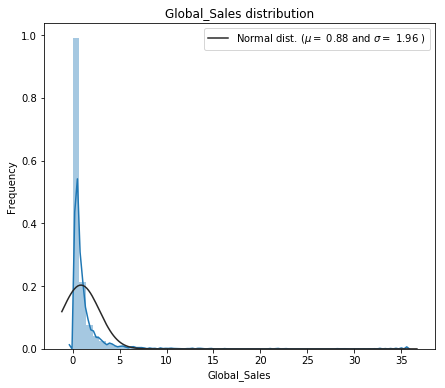

<Figure size 432x288 with 0 Axes>

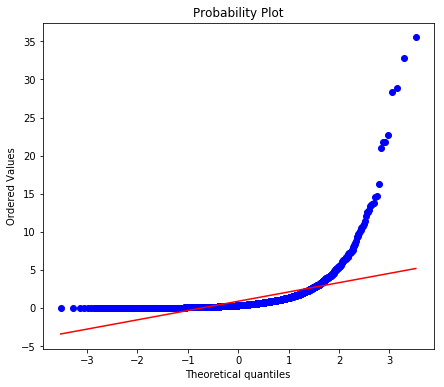

In [282]:
plt.figure(figsize = (7,6))
sns.distplot(df_generation['Global_Sales'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_generation['Global_Sales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Global_Sales distribution')

#Get also the QQ-plot
fig = plt.figure()
plt.figure(figsize = (7,6))
res = stats.probplot(df_generation['Global_Sales'], plot=plt)

plt.show()

From the above two figures, we found that global sales were not normal distributed. Thus we applied log transformation on global sales.

In [231]:
# log transform
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

### RandomForestRegression

In [232]:
# set the candidated parameters 
param_grid_rf = [{'n_estimators': [3, 10, 30, 50, 70,90], 'max_features': [0.2,0.4,0.6,0.8,1.0], 'max_depth': [ 5, 7, 9,11,13]}]

In [233]:
from sklearn.ensemble import RandomForestRegressor # import RandomForestRegressor
from sklearn.model_selection import GridSearchCV  # import GridSearchCV to find the best parameter
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error') # set parameter for grid search
grid_search_rf.fit(X_train, Y_train) # train model
print("Best parameters: {}".format(grid_search_rf.best_params_))
rf_best_cross_val_score = (np.sqrt(-grid_search_rf.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(rf_best_cross_val_score)))
rf_score = np.sqrt(-grid_search_rf.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(rf_score)))

Best parameters: {'max_depth': 13, 'max_features': 0.4, 'n_estimators': 70}
Best cross-validation score: 0.36
Test set score: 0.33


Train the model with the best parameters

In [242]:
rf = RandomForestRegressor(n_estimators = 70,max_features=0.4,max_depth=13) # set the parameter to the best parameter found by gridsearch

In [243]:
rf.fit(X_train, Y_train) # train model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features=0.4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

We used R square score to evaluate our model.

In [244]:
rf.score(X_test,Y_test) # calculate R2 score

0.6554563278138882

Text(0.5,1,'RandomForestRegressor')

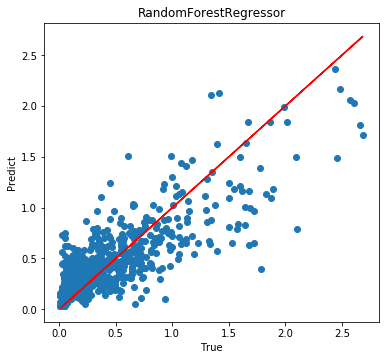

In [255]:
# make a plot for predicted value and true value for global sales
plt.figure(figsize = (6,5.5))
predict = rf.predict(X_test)
plt.scatter(Y_test,predict)
plt.plot(Y_test,Y_test,color = 'r')
plt.xlabel('True')
plt.ylabel('Predict')
plt.title('RandomForestRegressor')

### GradientBoostingRegressor

In [240]:
# set the candidated parameters for GradientBoostingRegressor
param_grid_gbr = [  {'n_estimators': [150, 200, 225, 250, 275],
                     'max_features': [0.25, 0.5, 0.75, 1.0], 
                     'max_depth': [ 5, 7, 9, 11, 13, 14]}]

In [241]:
from sklearn.ensemble import GradientBoostingRegressor
grid_search_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_gbr.best_params_))
gbr_best_cross_val_score = (np.sqrt(-grid_search_gbr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(gbr_best_cross_val_score)))
gbr_score = np.sqrt(-grid_search_gbr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(gbr_score)))

Best parameters: {'max_depth': 9, 'max_features': 0.25, 'n_estimators': 200}
Best cross-validation score: 0.35
Test set score: 0.33


In [259]:
gbr = GradientBoostingRegressor(n_estimators = 270, max_features = 0.25, max_depth = 5)
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=0.25,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=270, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [260]:
gbr.score(X_test,Y_test)

0.6751909477200522

Text(0.5,1,'GradientBoostingRegressor')

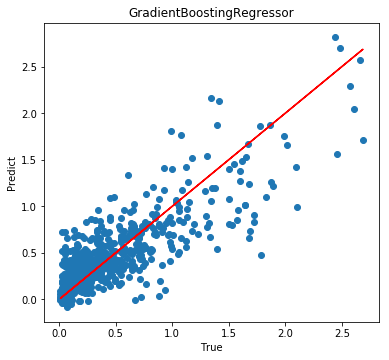

In [262]:
plt.figure(figsize = (6,5.5))
predict = gbr.predict(X_test)
plt.scatter(Y_test,predict)
plt.plot(Y_test,Y_test,color = 'r')
plt.xlabel('True')
plt.ylabel('Predict')
plt.title('GradientBoostingRegressor')

### XGBoosting

In [187]:
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

In [188]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

In [195]:
# define a function to print the mean score
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [196]:
# define a function to print the best parameters and score
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [237]:
xgb_model = xgb.XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_train, Y_train)

report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  3.2min finished


Model with rank: 1
Mean validation score: 0.618 (std: 0.024)
Parameters: {'colsample_bytree': 0.8940545085006171, 'gamma': 0.1941341919949361, 'learning_rate': 0.0988184237114849, 'max_depth': 5, 'n_estimators': 127, 'subsample': 0.7441380380821073}



In [238]:
# set xgb model with best parameters and train model with training set
xgb_model = xgb.XGBRegressor(colsample_bytree = 0.8940545085006171, 
          gamma = 0.1941341919949361, 
          learning_rate =  0.0988184237114849, 
          max_depth = 5, 
          n_estimators = 127, 
          subsample = 0.7441380380821073)

xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8940545085006171, gamma=0.1941341919949361,
       importance_type='gain', learning_rate=0.0988184237114849,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=127, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7441380380821073)

In [239]:
xgb_model.score(X_test, Y_test)

0.6851084937084939

Text(0.5,1,'XGBRegressor')

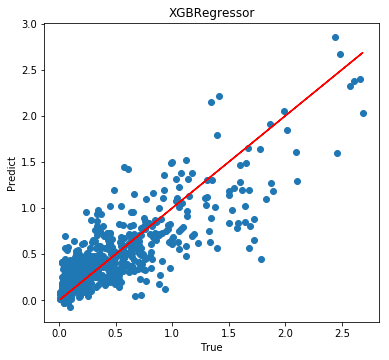

In [263]:
plt.figure(figsize = (6,5.5))
predict = xgb_model.predict(X_test)
plt.scatter(Y_test,predict)
plt.plot(Y_test,Y_test,color = 'r')
plt.xlabel('True')
plt.ylabel('Predict')
plt.title('XGBRegressor')